## Finite Element Analysis (FEA) Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:


# Define a simple triangular mesh
nodes = np.array([
    [0, 0], [1, 0], [2, 0],
    [0, 1], [1, 1], [2, 1],
    [0, 2], [1, 2], [2, 2]
])

elements = np.array([
    [0, 1, 3], [1, 4, 3],
    [1, 2, 4], [2, 5, 4],
    [3, 4, 6], [4, 7, 6],
    [4, 5, 7], [5, 8, 7]
])

# Apply a simple displacement field (simulating deformation)
displacement = np.array([
    [0.0, 0.0], [0.1, 0.0], [0.2, 0.0],
    [0.0, 0.1], [0.1, 0.2], [0.2, 0.1],
    [0.0, 0.2], [0.1, 0.3], [0.2, 0.2]
])

# Compute deformed mesh
deformed_nodes = nodes + displacement


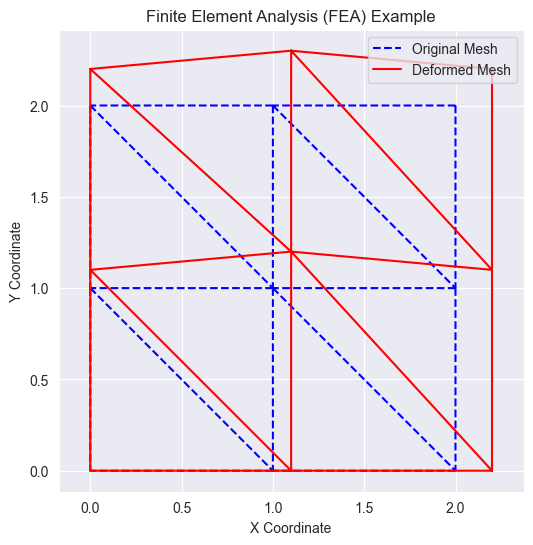

In [3]:

# Plot the original and deformed mesh
fig, ax = plt.subplots(figsize=(6, 6))
ax.triplot(nodes[:, 0], nodes[:, 1], elements, color='blue', linestyle='dashed', label="Original Mesh")
ax.triplot(deformed_nodes[:, 0], deformed_nodes[:, 1], elements, color='red', label="Deformed Mesh")

# Labels and Title
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Finite Element Analysis (FEA) Example")
ax.legend()
ax.axis('equal')

plt.show()

### Stiffness Matrix Calculation

Elasticity in 2D is described and solved.

In [6]:
import scipy.sparse as sp
import scipy.sparse.linalg as spla

In [4]:
# Define the number of nodes and elements
num_nodes = 6
num_elements = 4

# Define node coordinates
nodes = np.array([
    [0.0, 0.0],
    [1.0, 0.0],
    [2.0, 0.0],
    [0.5, 1.0],
    [1.5, 1.0],
    [1.0, 2.0]
])

# Define elements as connectivity between nodes
elements = np.array([
    [0, 1, 3],
    [1, 2, 4],
    [3, 4, 5],
    [1, 3, 4]
])

# Define material properties (Young's modulus and Poisson's ratio)
E = 200e9  # Young's modulus in Pascals
nu = 0.3   # Poisson's ratio

# Plane stress stiffness matrix (2D elasticity tensor)
C = (E / (1 - nu**2)) * np.array([
    [1, nu, 0],
    [nu, 1, 0],
    [0, 0, (1 - nu) / 2]
])

In [7]:
# Initialize global stiffness matrix
K = sp.lil_matrix((2 * num_nodes, 2 * num_nodes))


In [8]:
# Function to compute element stiffness matrix
def element_stiffness(x, y):
    B = np.array([
        [y[1] - y[2], y[2] - y[0], y[0] - y[1]],
        [x[2] - x[1], x[0] - x[2], x[1] - x[0]],
        [x[1] - x[2], y[2] - y[0], (x[0] - x[1]) + (y[0] - y[1])]
    ]) / (2 * np.linalg.det(np.array([[1, x[0], y[0]], [1, x[1], y[1]], [1, x[2], y[2]]])))
    return B.T @ C @ B

In [9]:

# Assemble global stiffness matrix
for element in elements:
    x, y = nodes[element, 0], nodes[element, 1]
    ke = element_stiffness(x, y)
    dof = np.array([2 * element[0], 2 * element[0] + 1, 2 * element[1], 2 * element[1] + 1,
                    2 * element[2], 2 * element[2] + 1])
    for i in range(6):
        for j in range(6):
            K[dof[i], dof[j]] += ke[i % 3, j % 3]

In [10]:
# Apply boundary conditions (fixed at bottom nodes)
fixed_dofs = np.array([0, 1, 2, 3, 4, 5])
free_dofs = np.setdiff1d(np.arange(2 * num_nodes), fixed_dofs)

# Define external forces (force at node 5 in y-direction)
F = np.zeros(2 * num_nodes)
F[11] = -1000  # Force in Newtons

# Solve for displacements
K_free = K[free_dofs, :][:, free_dofs]
F_free = F[free_dofs]
U_free = spla.spsolve(K_free.tocsc(), F_free)

# Reconstruct full displacement vector
U = np.zeros(2 * num_nodes)
U[free_dofs] = U_free

In [11]:
# Compute deformed mesh
scale = 1000  # Scaling factor for visualization
deformed_nodes = nodes + scale * U.reshape(num_nodes, 2)

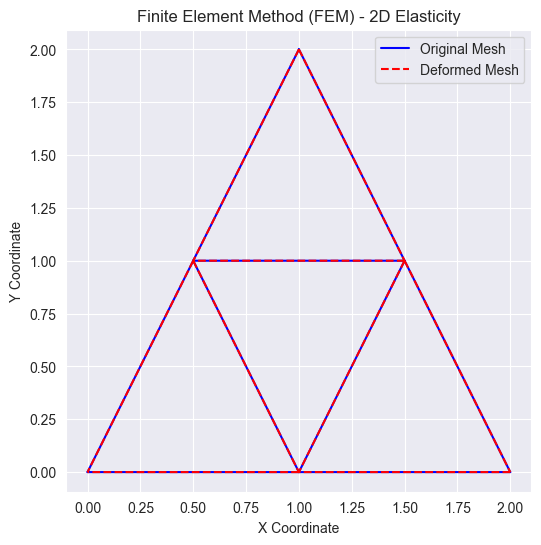

In [14]:
# Plot original and deformed structure
fig, ax = plt.subplots(figsize=(6, 6))
ax.triplot(nodes[:, 0], nodes[:, 1], elements, color='blue', label="Original Mesh")
ax.triplot(deformed_nodes[:, 0], deformed_nodes[:, 1], elements, color='red',linestyle='dashed', label="Deformed Mesh")

# Labels and Title
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Finite Element Method (FEM) - 2D Elasticity")
ax.legend()
ax.axis('equal')

plt.show()

### Animation

In [15]:
# Define the number of nodes and elements
num_nodes = 6
num_elements = 4

# Define node coordinates
nodes = np.array([
    [0.0, 0.0],
    [1.0, 0.0],
    [2.0, 0.0],
    [0.5, 1.0],
    [1.5, 1.0],
    [1.0, 2.0]
])

# Define elements as connectivity between nodes
elements = np.array([
    [0, 1, 3],
    [1, 2, 4],
    [3, 4, 5],
    [1, 3, 4]
])

# Define material properties (Young's modulus and Poisson's ratio)
E = 200e9  # Young's modulus in Pascals
nu = 0.3   # Poisson's ratio

# Plane stress stiffness matrix (2D elasticity tensor)
C = (E / (1 - nu**2)) * np.array([
    [1, nu, 0],
    [nu, 1, 0],
    [0, 0, (1 - nu) / 2]
])

In [16]:
# Initialize global stiffness matrix
K = sp.lil_matrix((2 * num_nodes, 2 * num_nodes))

In [25]:
# Function to compute element stiffness matrix
def element_stiffness(x, y):
    area = 0.5 * np.linalg.det(np.array([[1, x[0], y[0]], [1, x[1], y[1]], [1, x[2], y[2]]]))
    B = np.array([
        [y[1] - y[2], y[2] - y[0], y[0] - y[1]],
        [x[2] - x[1], x[0] - x[2], x[1] - x[0]],
        [x[1] - x[2], y[2] - y[0], (x[0] - x[1]) + (y[0] - y[1])]
    ]) / (2 * area)
    return area * B.T @ C @ B

In [26]:
# Assemble global stiffness matrix
for element in elements:
    indices = element
    x, y = nodes[indices, 0], nodes[indices, 1]
    ke = element_stiffness(x, y)
    dof = np.hstack([[2*i, 2*i+1] for i in indices])
    for i in range(6):
        for j in range(6):
            K[dof[i], dof[j]] += ke[i % 3, j % 3]

In [27]:
# Apply boundary conditions (fixed at bottom nodes)
fixed_dofs = np.array([0, 1, 2, 3, 4, 5])
free_dofs = np.setdiff1d(np.arange(2 * num_nodes), fixed_dofs)

# Define external forces (force at node 5 in y-direction)
F = np.zeros(2 * num_nodes)
F[11] = -1000  # Force in Newtons

# Solve for displacements
K_free = K[free_dofs, :][:, free_dofs].tocsc()
F_free = F[free_dofs]
U_free = spla.spsolve(K_free, F_free)

# Reconstruct full displacement vector
U = np.zeros(2 * num_nodes)
U[free_dofs] = U_free

# Compute deformed mesh with scaling factor
scale = 1000  # Scaling factor for visualization
deformed_nodes = nodes + scale * U.reshape(num_nodes, 2)

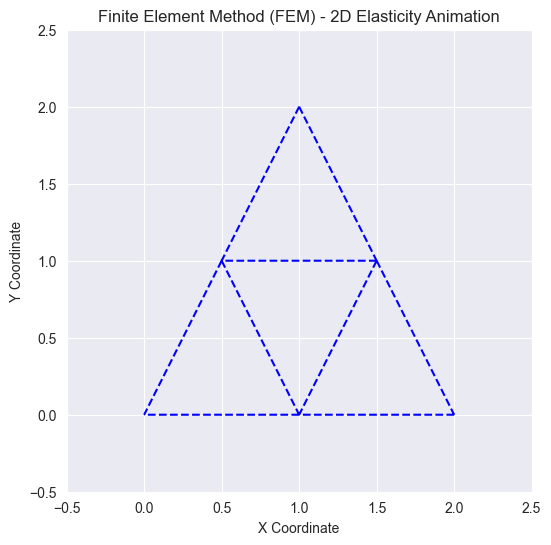

In [28]:
# Set up the animation
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 2.5)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Finite Element Method (FEM) - 2D Elasticity Animation")

# Plot original mesh
ax.triplot(nodes[:, 0], nodes[:, 1], elements, color='blue', linestyle='dashed', label="Original Mesh")


In [22]:
import matplotlib.animation as animation

In [29]:
# Function to update animation
def update(frame):
    factor = 1 + 0.2 * np.sin(2 * np.pi * frame / 50)  # Create oscillating deformation effect
    animated_nodes = nodes + factor * scale * U.reshape(num_nodes, 2)
    ax.clear()
    ax.triplot(nodes[:, 0], nodes[:, 1], elements, color='blue', linestyle='dashed', label="Original Mesh")
    ax.triplot(animated_nodes[:, 0], animated_nodes[:, 1], elements, color='red', label="Deformed Mesh")
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, 2.5)
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_title("Finite Element Method (FEM) - 2D Elasticity Animation")
    ax.legend()
    ax.axis('equal')

# Create animation
ani = animation.FuncAnimation(fig, update, frames=50, interval=50, repeat=True)

plt.show()

In [30]:
# Save animation as a GIF
ani.save('fea_animation.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.
